<a href="https://colab.research.google.com/github/Daneshwar7071/Brain-Tumor-Classification/blob/main/Brain_Tumor_Classification1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Unzipping the dataset
!unzip /content/brain_tumour_dataset.zip

Archive:  /content/brain_tumour_dataset.zip
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).png  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1).tif  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (10).tif  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (100).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1000).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1001).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1002).JPG  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1003).jpg  
  inflating: Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor/Cancer (1004).jpg  
  inflating: 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import math
import glob

In [4]:
#Count the no. of images in the respective classes 0 - Brain Tumour and 1 - Healthy Brain
ROOT_DIR = '/content/Brain Tumor Data Set/Brain Tumor Data Set'
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))


In [5]:
number_of_images.items()

dict_items([('Healthy', 2087), ('Brain Tumor', 2513)])

In [6]:
#Creating a train folder

def dataFolder(p, split):

  if not os.path.exists("./" + p):
    os.mkdir("./" + p)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+p+"/"+dir)
      for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)),
                                  size = (math.floor(split*number_of_images[dir])-5),
                                  replace = False):
        O = os.path.join(ROOT_DIR, dir, img)
        D = os.path.join("./"+p, dir)
        shutil.copy(O, D)
        os.remove(O)
  else:
    print(f"{p} folder exists.")

In [7]:
dataFolder("train",0.7)

In [8]:
dataFolder("val",0.15)

dataFolder("test",0.15)

In [9]:
dataFolder("test",0.15)

In [10]:
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

dict_items([('Healthy', 16), ('Brain Tumor', 17)])

In [11]:
from keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras

In [12]:
#CNN Model

model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', input_shape = (224,224,3)))

model.add(Conv2D(filters = 36, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 36)        │           5,220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 36)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 64)        │          20,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,537,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,638,245 (21.51 MB)

 Trainable params: 5,638,245 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer = 'adam', loss = keras.losses.binary_crossentropy, metrics = ['accuracy'])

In [14]:
def preprocessingImages1(path):
  """
  input : Path
  output : Pre processed images
  """

  image_data = ImageDataGenerator(zoom_range= 0.2, shear_range= 0.2, rescale= 1/255, horizontal_flip= True) #data augmentation
  image = image_data.flow_from_directory(directory= path, target_size= (224, 224), batch_size = 32, class_mode= 'binary')

  return image

In [15]:
path = '/content/train'
train_data = preprocessingImages1(path)

Found 3209 images belonging to 2 classes.


In [16]:
def preprocessingImages2(path):
  """
  input : Path
  output : Pre processed images
  """

  image_data = ImageDataGenerator(rescale= 1/255)
  image = image_data.flow_from_directory(directory= path, target_size= (224, 224), batch_size = 32, class_mode= 'binary')

  return image

In [17]:
path = '/content/test'
test_data = preprocessingImages2(path)

Found 679 images belonging to 2 classes.


In [18]:
path = '/content/val'
val_data = preprocessingImages2(path)

Found 679 images belonging to 2 classes.


In [19]:
#Early stopping and model checkpoint

from keras.callbacks import ModelCheckpoint, EarlyStopping

#earlystopping
es = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01, patience = 6, verbose = 1,mode = 'auto')

#modelcheckpoint
mc = ModelCheckpoint(monitor = 'val_accuracy',filepath = './bestmodel.keras', save_best_only = True, verbose = 1, mode = 'auto')

cd = [es,mc]

In [20]:
hs = model.fit(train_data,
               steps_per_epoch = 8,
               epochs = 30,
               verbose = 1,
               validation_data = val_data,
               validation_steps = 16,
               callbacks = cd)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.4984 - loss: 0.8196
Epoch 1: val_accuracy improved from -inf to 0.45703, saving model to ./bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 25s 994ms/step - accuracy: 0.4999 - loss: 0.8145 - val_accuracy: 0.4570 - val_loss: 0.7170
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.5494 - loss: 0.6899
Epoch 2: val_accuracy improved from 0.45703 to 0.61078, saving model to ./bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 872ms/step - accuracy: 0.5487 - loss: 0.6900 - val_accuracy: 0.6108 - val_loss: 0.6566
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.5783 - loss: 0.6796
Epoch 3: val_accuracy improved from 0.61078 to 0.63867, saving model to ./bestmodel.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 490ms/step - accuracy: 0.5792 - loss: 0.6791 - val_accuracy: 0.6387 - val_loss: 0.6050
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.6118 - loss: 0.6505
Epoch 4: val_accuracy improved from 0.63867 to 0.64

In [21]:
#Model Graphical Interpretation

h = hs.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

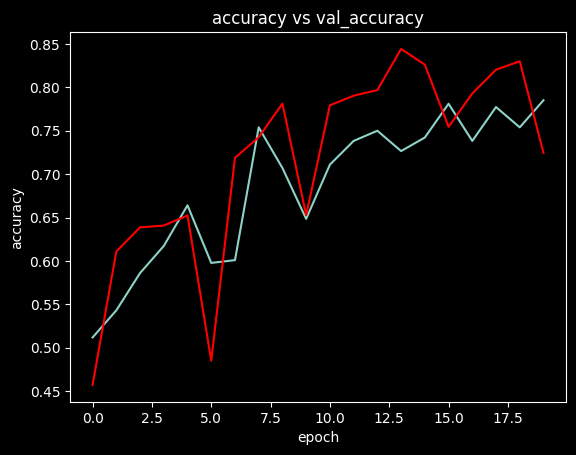

In [22]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = 'red')
plt.title("accuracy vs val_accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

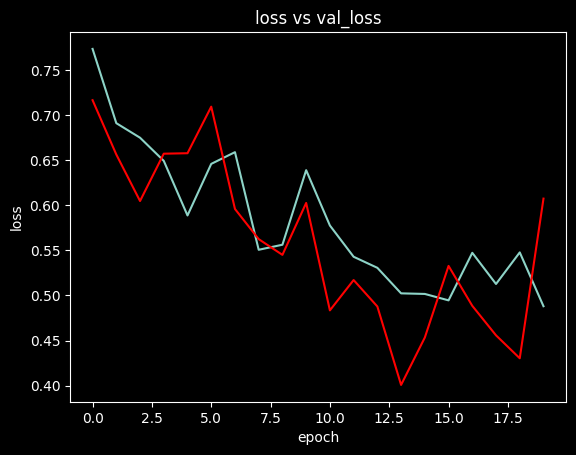

In [23]:
plt.style.use('dark_background')

plt.plot(h['loss'])
plt.plot(h['val_loss'], c = 'red')
plt.title("loss vs val_loss")
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

In [24]:
#Model Accuracy

from keras.models import load_model

model = load_model('/content/bestmodel.keras')

In [25]:
acc = model.evaluate(test_data)[1]
print(f"Our model accuracy is {acc*100} %")

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.7858 - loss: 0.4807
Our model accuracy is 79.52871918678284 %


In [26]:
from keras.preprocessing.image import load_img, img_to_array

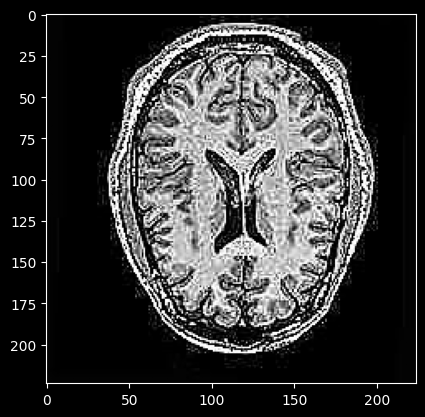

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 870ms/step
No Brain Tumor Detected


In [28]:
path = "/content/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (862).jpg"
img = load_img(path, target_size = (224,224))

input_arr = img_to_array(img)/255     #normalizing the image

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis = 0)

pred = model.predict(input_arr)[0][0]
pred

if pred <= 0.5:
  print("\033[1mBrain Tumor Detected")
else:
  print("No Brain Tumor Detected\033[0m")